In [1]:
import os
import numpy as np
from scipy import sparse
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D, axes3d

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs

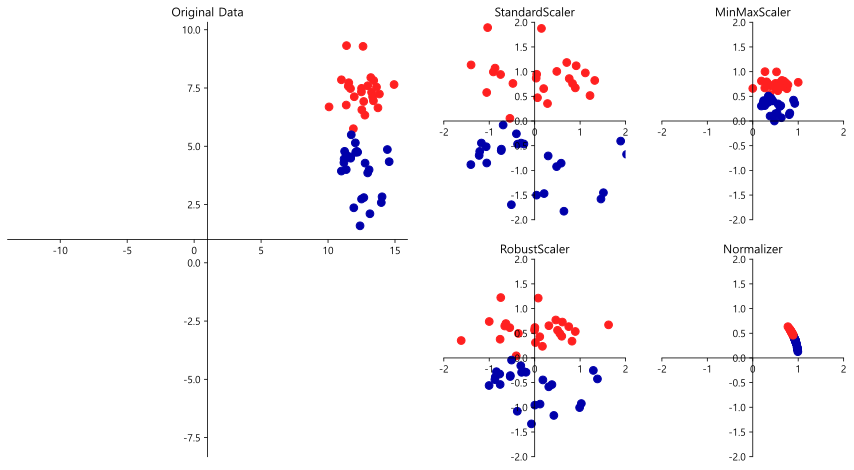

In [2]:
mglearn.plots.plot_scaling()

In [5]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=1)

In [9]:
scaler = MinMaxScaler().fit(X_train)

In [12]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled.max(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [13]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled.max(axis=0)

array([0.9578778 , 0.81501522, 0.95577362, 0.89353128, 0.81132075,
       1.21958701, 0.87956888, 0.9333996 , 0.93232323, 1.0371347 ,
       0.42669616, 0.49765736, 0.44117231, 0.28371044, 0.48703131,
       0.73863671, 0.76717172, 0.62928585, 1.33685792, 0.39057253,
       0.89612238, 0.79317697, 0.84859804, 0.74488793, 0.9154725 ,
       1.13188961, 1.07008547, 0.92371134, 1.20532319, 1.63068851])

In [20]:
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

(0.0, 10.0)

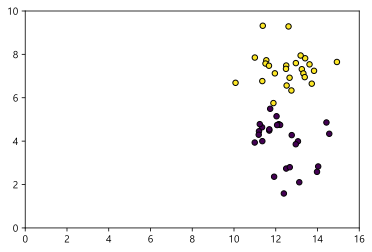

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 16)
plt.ylim(0, 10)

In [23]:
scaler = QuantileTransformer(n_quantiles=50).fit(X)
X_trans = scaler.transform(X)

(0.0, 5.0)

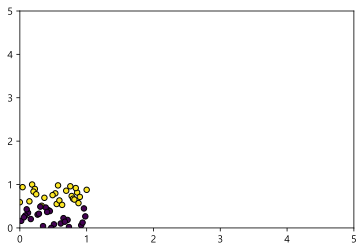

In [24]:
plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 5)
plt.ylim(0, 5)

In [25]:
scaler.quantiles_

array([[10.07391193,  1.58657135],
       [10.99313649,  2.10376912],
       [10.99815287,  2.36006775],
       [11.18378052,  2.58367939],
       [11.19679821,  2.73569682],
       [11.23501274,  2.79716835],
       [11.34468785,  2.83183283],
       [11.35656532,  3.85665806],
       [11.35760513,  3.93528488],
       [11.37839711,  3.99078055],
       [11.5093186 ,  3.99907772],
       [11.54824906,  4.27689813],
       [11.67494727,  4.29564214],
       [11.68937095,  4.3389402 ],
       [11.69289001,  4.45456477],
       [11.7337095 ,  4.48709629],
       [11.8888119 ,  4.54322016],
       [11.92229526,  4.63824349],
       [11.95786868,  4.74115688],
       [12.03763281,  4.7467316 ],
       [12.06439343,  4.78117369],
       [12.1438515 ,  4.78248134],
       [12.20989214,  4.85948594],
       [12.38860303,  5.14664757],
       [12.49123469,  5.49162431],
       [12.50048972,  5.75339082],
       [12.50229021,  6.33454307],
       [12.5211582 ,  6.56405517],
       [12.61215674,

In [26]:
scaler = QuantileTransformer(output_distribution='normal', n_quantiles=50).fit(X)
X_trans = scaler.transform(X)

(-5.0, 5.0)

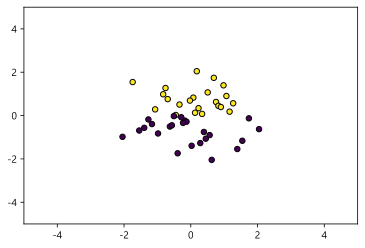

In [28]:
plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(-5, 5)
plt.ylim(-5, 5)

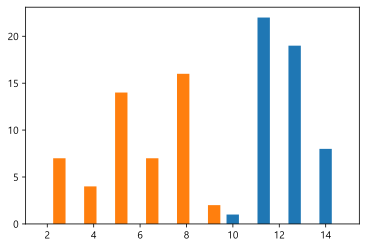

In [34]:
plt.hist(X)
plt.show()

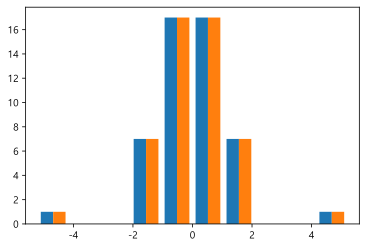

In [37]:
X_trans = QuantileTransformer(output_distribution='normal', n_quantiles=50).fit(X).transform(X)
plt.hist(X_trans)
plt.show()

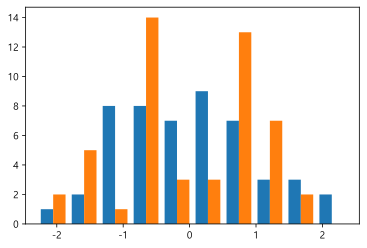

In [38]:
X_trans = StandardScaler().fit(X).transform(X)
plt.hist(X_trans)
plt.show()

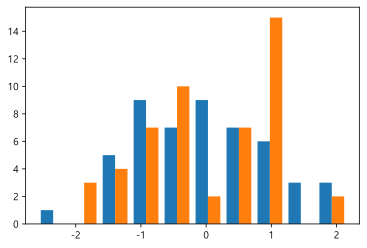

In [39]:
X_trans = PowerTransformer(method='box-cox').fit(X).transform(X)
plt.hist(X_trans)
plt.show()

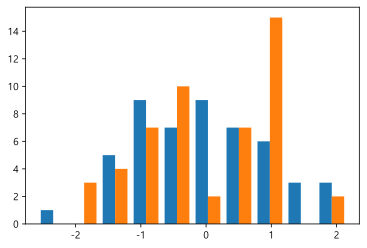

In [40]:
X_trans = PowerTransformer(method='yeo-johnson').fit(X).transform(X)
plt.hist(X_trans)
plt.show()

In [42]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

In [44]:
svm = SVC(gamma='auto').fit(X_train, y_train)
svm.score(X_train, y_train), svm.score(X_test, y_test)

(1.0, 0.6293706293706294)

In [45]:
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
svm = SVC(gamma='auto').fit(X_train_scaled, y_train)
svm.score(X_train_scaled, y_train), svm.score(X_test_scaled, y_test)

(0.9483568075117371, 0.951048951048951)

In [48]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
svm = SVC(gamma='auto').fit(X_train_scaled, y_train)
svm.score(X_train_scaled, y_train), svm.score(X_test_scaled, y_test)

(0.9859154929577465, 0.965034965034965)

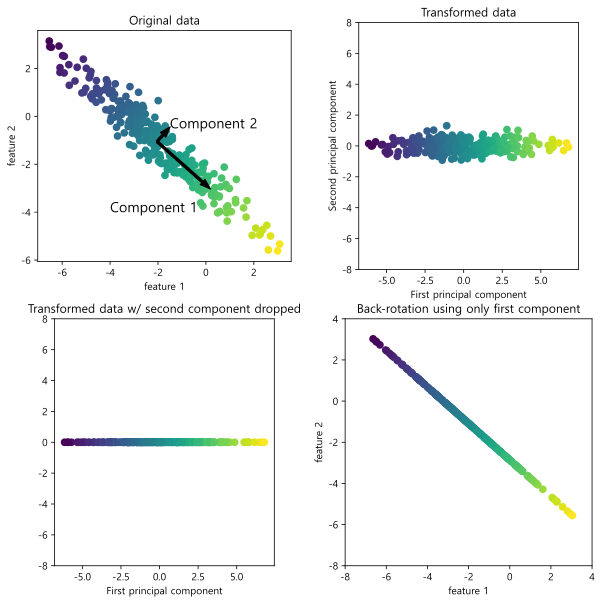

In [51]:
mglearn.plots.plot_pca_illustration()

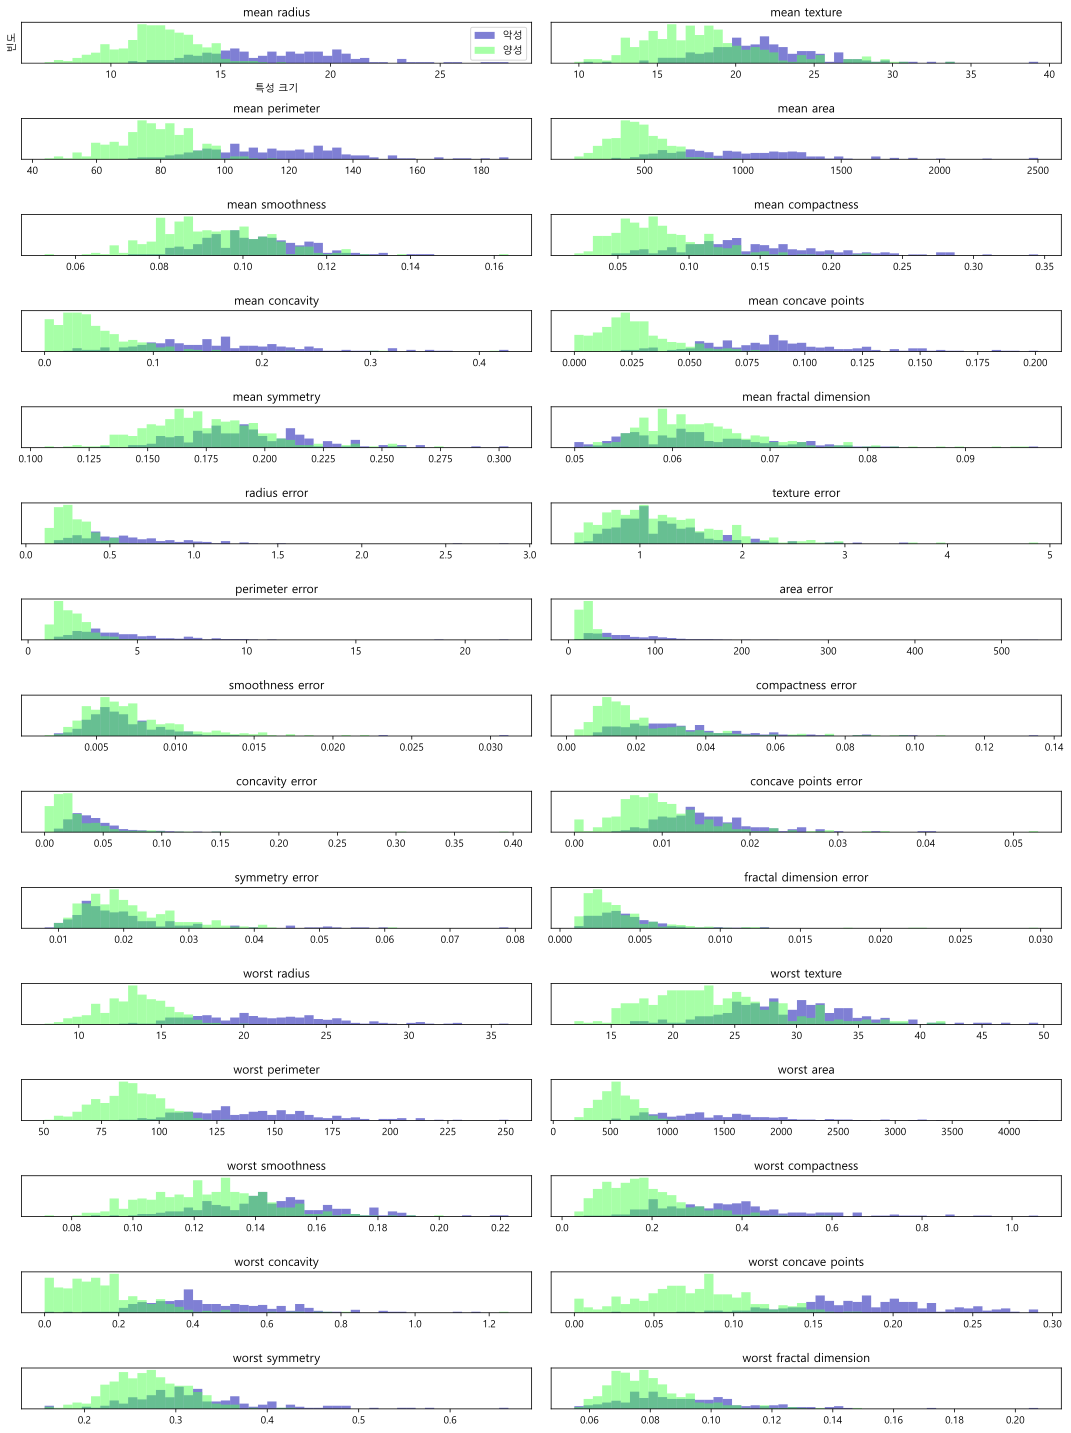

In [53]:
fig, axs = plt.subplots(15, 2, figsize=(15, 20))
malignant = cancer['data'][cancer['target'] == 0]
benign = cancer['data'][cancer['target'] == 1]

ax = axs.ravel()

for i in range(30):
    _, bins = np.histogram(cancer['data'][:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=0.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=0.5)
    ax[i].set_title(cancer['feature_names'][i])
    ax[i].set_yticks(())
ax[0].set_xlabel('특성 크기')
ax[0].set_ylabel('빈도')
ax[0].legend(['악성', '양성'])
fig.tight_layout()

In [54]:
np.histogram(cancer['data'][:, 0], bins=50)

(array([ 1,  3,  2,  5,  8, 10, 18, 13, 14, 24, 38, 39, 39, 35, 34, 35, 25,
        25, 28, 16, 16, 13,  7,  8, 11,  8, 11,  9, 11, 11,  7, 13,  9,  4,
         5,  1,  1,  0,  4,  1,  1,  1,  0,  1,  1,  0,  0,  1,  1,  1],
       dtype=int64),
 array([ 6.981  ,  7.40358,  7.82616,  8.24874,  8.67132,  9.0939 ,
         9.51648,  9.93906, 10.36164, 10.78422, 11.2068 , 11.62938,
        12.05196, 12.47454, 12.89712, 13.3197 , 13.74228, 14.16486,
        14.58744, 15.01002, 15.4326 , 15.85518, 16.27776, 16.70034,
        17.12292, 17.5455 , 17.96808, 18.39066, 18.81324, 19.23582,
        19.6584 , 20.08098, 20.50356, 20.92614, 21.34872, 21.7713 ,
        22.19388, 22.61646, 23.03904, 23.46162, 23.8842 , 24.30678,
        24.72936, 25.15194, 25.57452, 25.9971 , 26.41968, 26.84226,
        27.26484, 27.68742, 28.11   ]))

In [55]:
scaler = StandardScaler().fit(cancer['data'])
X_scaled = scaler.transform(cancer['data'])

In [57]:
pca = PCA(n_components=2).fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [58]:
X_scaled.shape, X_pca.shape

((569, 30), (569, 2))

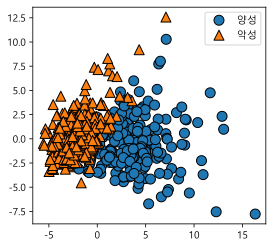

In [65]:
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer['target'])
plt.legend(['양성', '악성'])
plt.gca().set_aspect('equal')

In [68]:
pca.components_.shape

(2, 30)

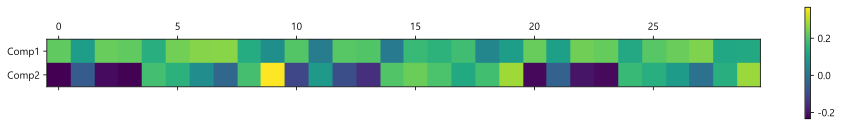

In [73]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['Comp1', 'Comp2'])
plt.colorbar()
plt.xticks(range(len(cancer['feature_name'])), cancer['feature_name'], rotation=)